# Analyzing data science articles

This notebook recreate the study present [here](https://medium.com/the-mission/this-new-data-will-make-you-rethink-how-you-write-headlines-751358f6639a) focusing in data science articles. 

The data for this notebook can be found [here](https://www.kaggle.com/viniciuslambert/medium-data-science-articles-dataset).


## Possible questions:

- What is the influence of headlines in popularity?
- Does reading time influence in popularity?
- does the author matter?
- there was a better day to post?


## CRISP-DM

- Business Undestanding
- Data Undestanding
- Prepare Data
- Model Data
- Result 
- Deploy

In [1]:
import numpy as np
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_colwidth', None)

df = pd.read_csv('medium-data-science-articles-2020.csv')


print(df.shape)
df.head()

(108021, 10)


,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
0,https://towardsdatascience.com/making-python-programs-blazingly-fast-c1cd79bd1b32,Making Python Programs Blazingly Fast,martin.heinz,https://towardsdatascience.com/@martin.heinz,Let’s look at the performance of our Python programs and see how…,3300.0,3,5,Data Science,2020-01-01
1,https://towardsdatascience.com/how-to-be-fancy-with-python-8e4c53f47789,How to be fancy with Python,dipam44,https://towardsdatascience.com/@dipam44,Python tricks that will make your life easier,1700.0,12,5,Data Science,2020-01-01
2,https://uxdesign.cc/how-exactly-do-you-find-insights-from-qualitative-user-research-603bcafbc8b3,How exactly do you find insights from qualitative user research?,taylornguyen144,https://uxdesign.cc/@taylornguyen144,Visualizing the synthesis processes…,1100.0,3,4,Data Science,2020-01-01
3,https://towardsdatascience.com/from-scratch-to-search-playing-with-your-data-elasticsearch-ingest-pipelines-6d054bf5d866,From scratch to search: playing with your data (Elasticsearch Ingest Pipelines),stanislavprihoda,https://towardsdatascience.com/@stanislavprihoda,One Pipeline to rule…,232.0,1,9,Data Science,2020-01-01
4,https://www.cantorsparadise.com/the-waiting-paradox-an-intro-to-probability-distributions-97c0aedb8c1,The Waiting Paradox: An Intro to Probability Distributions,maikeelisa,https://www.cantorsparadise.com/@maikeelisa,How much longer do I have to wait for my…,859.0,5,8,Data Science,2020-01-01


## Find url duplicateds values and drop it

In [2]:
print(df.url.duplicated().sum())
df[df.url.duplicated(keep=False)]

50


,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
512,https://towardsdatascience.com/top-10-technology-trends-for-2020-4a179fdd53b1,Top 10 Technology Trends for 2020,ryanraiker,https://towardsdatascience.com/@ryanraiker,Strategies and things that will change the way we think and work,3100.0,12,10,Data Science,2020-01-03
4211,https://medium.com/@mike-meyer/redefining-our-information-as-wealth-a118388a7992,Redefining Our Information as Wealth,mike-meyer,https://medium.com/@mike-meyer,How information as assets will correct our economic distortions,87.0,0,6,Data,2020-01-16
4469,https://medium.com/@mike-meyer/redefining-our-information-as-wealth-a118388a7992,I know that Umair has complained a lot about how self-identity was considered the important issue,Aelle1,https://medium.com/@Aelle1,"I think special consideration needs to be made about large quantities of data, data that is too big to be…",5.0,0,2,Data,2020-01-17
6235,https://medium.com/@pkwete/predicting-the-wuhan-coronavirus-global-spread-c662bf5c5bb3,Predicting the Wuhan Coronavirus’ Global Spread,pkwete,https://medium.com/@pkwete,NaN,0.0,0,2,Data Science,2020-01-26
10222,https://onezero.medium.com/how-to-find-out-what-google-and-other-big-tech-companies-know-about-you-649fd368d10e,How to Find Out What Google and Other Big Tech Companies Know About You,tomsmith585,https://onezero.medium.com/@tomsmith585,It’s illuminating — and a bit…,4200.0,24,7,Artificial Inteligence,2020-02-11
...,...,...,...,...,...,...,...,...,...,...
100795,https://towardsdatascience.com/python-alone-wont-get-you-a-data-science-job-a780085ac640,The Zero Knowledge Audience,tigerarcades,https://medium.com/@tigerarcades,NaN,1.0,1,2,Data Science,2020-12-06
100823,https://medium.com/technology-hits/introduction-to-technology-hits-7665b8d5e950,I’ll hug Technology Hits,dviggo,https://medium.com/@dviggo,NaN,97.0,1,1,Data Science,2020-12-06
103683,https://towardsdatascience.com/how-fast-is-c-compared-to-python-978f18f474c7,How Fast Is C++ Compared to Python?,tamimi-naser,https://towardsdatascience.com/@tamimi-naser,An example for data scientists who believe they don’t need to know C++,2000.0,58,4,Data Science,2020-12-16
104448,https://towardsdatascience.com/how-fast-is-c-compared-to-python-978f18f474c7,Generate all the combinations (k-mers) of four nucleotides in C++,razvnpp,https://medium.com/@razvnpp,The story is my reply to the original article here:https://towardsdatascience.com/how-fast-is-c-compared-to-python-978f18f474c7,0.0,0,1,Data Science,2020-12-18


In [3]:
# I analysed the values and conclude that the correct duplicated values 
#is aways the first! So let's keep it.

df = df.drop_duplicates(subset=['url'], keep='first')
print(df.url.duplicated().sum())
df.shape

0


(107971, 10)

## Get most popular words in titles

### cleaning the data

In [4]:
df.title[:30]

0                                                                                      Making Python Programs Blazingly Fast
1                                                                                                How to be fancy with Python
2                                                           How exactly do you find insights from qualitative user research?
3                                            From scratch to search: playing with your data (Elasticsearch Ingest Pipelines)
4                                                                 The Waiting Paradox: An Intro to Probability Distributions
5                                                                         Sentiment Analysis of Movie Reviews in NLTK Python
6                                                                       How to Write Scripts That Check Data Quality For You
7                                                              Gradient Based Optimizations: Jacobians, Jababians & Hessians


As you can see, it has some confusing character, so we need to normalize the data.

In [5]:
def normalize_title(title):
    title = unicodedata.normalize("NFKD", title) # normalize data to remove line breakers
    title = re.sub('<[^>]+>', '', title) # remove anything beteween <> (html noise)
    title = re.sub(" \d+", r" X", title) # replace numbers by X 
    return title 
    
df.title = df.title.apply(normalize_title)
df.title[:30]

0                                               Making Python Programs Blazingly Fast
1                                                         How to be fancy with Python
2                    How exactly do you find insights from qualitative user research?
3     From scratch to search: playing with your data (Elasticsearch Ingest Pipelines)
4                          The Waiting Paradox: An Intro to Probability Distributions
5                                  Sentiment Analysis of Movie Reviews in NLTK Python
6                                How to Write Scripts That Check Data Quality For You
7                       Gradient Based Optimizations: Jacobians, Jababians & Hessians
8                      [Time Series Forecast] Anomaly detection with Facebook Prophet
9                                                          Decision Trees for Dummies
10                                                               Kaggle User Survey X
11               Intuition behind Naive Bayes algorith

## What is the most popular set of words?

In [6]:
words_count = {}

for title in df.title:
    splited_title = title.split(' ')
    if len(splited_title) > 2:
        for i in range((len(splited_title) - 2)):
            word_group = f'{splited_title[i]} {splited_title[i+1]} {splited_title[i+2]}'
            if word_group in words_count.keys():
                words_count[word_group] += 1 # apeear one more time
            else:
                words_count[word_group] = 1 # appear for the first time

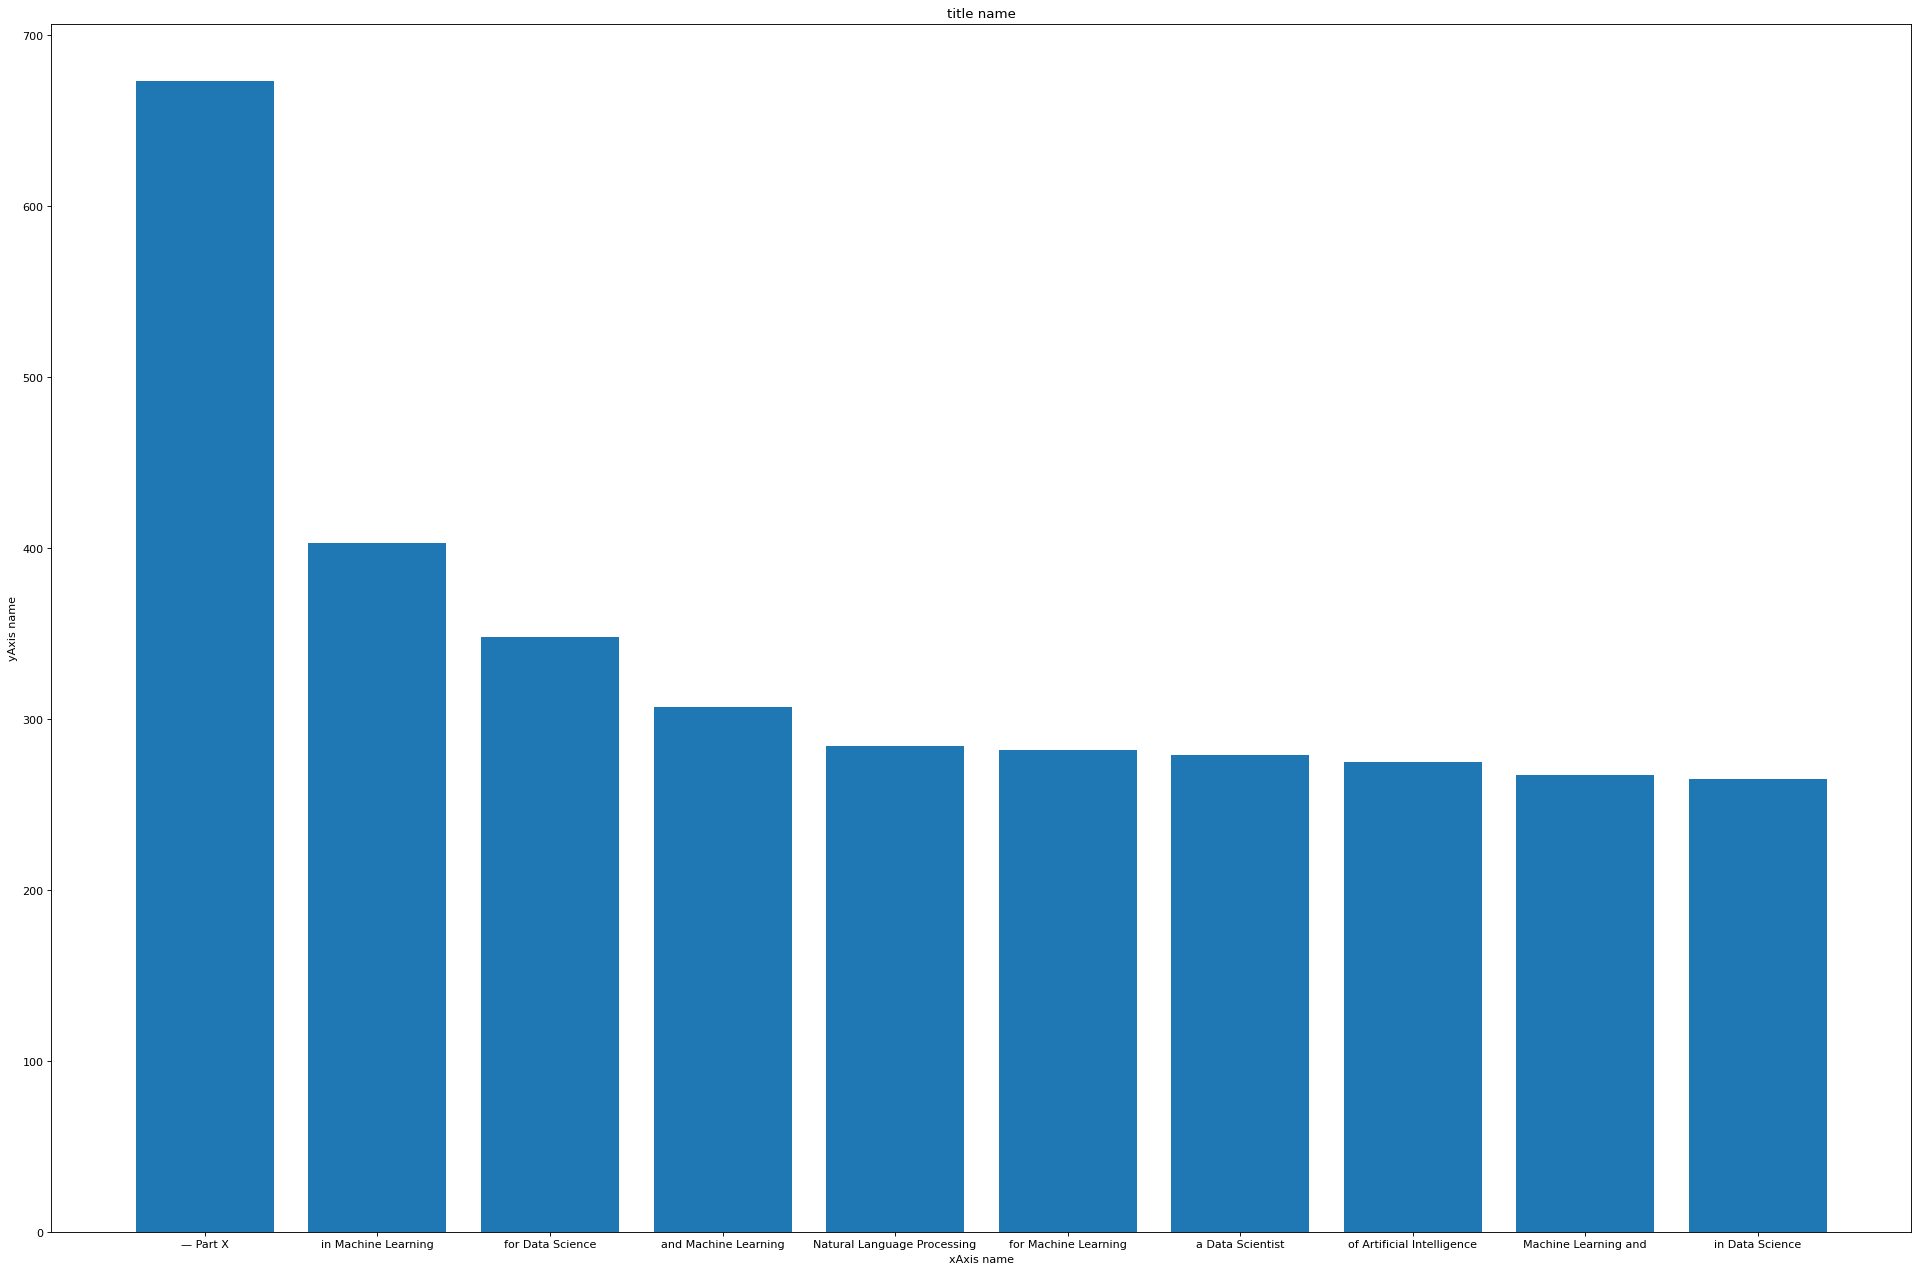

In [20]:
sorted_word_counts = pd.DataFrame(sorted(words_count.items(), key=lambda x: x[1], reverse=True), 
                                  columns=['word_set', 'apparitions'])

plt.figure(figsize=(30, 20), dpi=80)
plt.bar(sorted_word_counts.word_set[:10],sorted_word_counts.apparitions[:10])
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

That was the most commons words in data science headlines, but is that the one one more get claps and responses?

In [44]:
words_claps_popularity = {}

for title, claps in zip(df.title, df.claps):
    splited_title = title.split(' ')
    if len(splited_title) > 2:
        for i in range((len(splited_title) - 2)):
            word_group = f'{splited_title[i]} {splited_title[i+1]} {splited_title[i+2]}'
            if word_group in words_claps_popularity.keys():
                words_claps_popularity[word_group]['count'] += 1
                words_claps_popularity[word_group]['total_claps'] += claps
            else:
                words_claps_popularity[word_group] = {'count' : 1, 
                                                      'total_claps': claps}
                

words_claps_popularity            

{'Making Python Programs': {'count': 1, 'total_claps': 3300.0},
 'Python Programs Blazingly': {'count': 1, 'total_claps': 3300.0},
 'Programs Blazingly Fast': {'count': 1, 'total_claps': 3300.0},
 'How to be': {'count': 33, 'total_claps': 5831.0},
 'to be fancy': {'count': 2, 'total_claps': 2673.0},
 'be fancy with': {'count': 2, 'total_claps': 2673.0},
 'fancy with Python': {'count': 1, 'total_claps': 1700.0},
 'How exactly do': {'count': 1, 'total_claps': 1100.0},
 'exactly do you': {'count': 1, 'total_claps': 1100.0},
 'do you find': {'count': 1, 'total_claps': 1100.0},
 'you find insights': {'count': 1, 'total_claps': 1100.0},
 'find insights from': {'count': 1, 'total_claps': 1100.0},
 'insights from qualitative': {'count': 1, 'total_claps': 1100.0},
 'from qualitative user': {'count': 1, 'total_claps': 1100.0},
 'qualitative user research?': {'count': 1, 'total_claps': 1100.0},
 'From scratch to': {'count': 1, 'total_claps': 232.0},
 'scratch to search:': {'count': 1, 'total_clap

In [45]:
# Get only the popular set words
words_claps_popularity = {key:val for key, val in words_claps_popularity.items() if val['count'] >= 50}


print(len(words_claps_popularity))
words_claps_popularity

183


{'of Data Science': {'count': 198, 'total_claps': 12035.0},
 'Data Science Project': {'count': 109, 'total_claps': 11104.0},
 'for Machine Learning': {'count': 282, 'total_claps': 32257.0},
 'in Machine Learning': {'count': 403, 'total_claps': 33180.0},
 'Principal Component Analysis': {'count': 80, 'total_claps': 8082.0},
 'Data Science and': {'count': 211, 'total_claps': 15105.0},
 'Data Science —': {'count': 99, 'total_claps': 4391.0},
 'in Data Science': {'count': 265, 'total_claps': 26079.0},
 'Time Series Analysis': {'count': 94, 'total_claps': 7632.0},
 'and how to': {'count': 82, 'total_claps': 4466.0},
 'to become a': {'count': 73, 'total_claps': 5997.0},
 'a data scientist': {'count': 51, 'total_claps': 3465.0},
 'Your Data Science': {'count': 86, 'total_claps': 9360.0},
 'and How to': {'count': 74, 'total_claps': 6157.0},
 'An Introduction to': {'count': 162, 'total_claps': 21253.0},
 'with Python and': {'count': 70, 'total_claps': 6403.0},
 'using Deep Learning': {'count': 

In [46]:
# Extrac the mean value of the set of words.
for key in words_claps_popularity.keys():
    words_claps_popularity[key]['claps_mean'] = words_claps_popularity[key]['total_claps'] / words_claps_popularity[key]['count']
    
        
words_claps_popularity

{'of Data Science': {'count': 198,
  'total_claps': 12035.0,
  'claps_mean': 60.782828282828284},
 'Data Science Project': {'count': 109,
  'total_claps': 11104.0,
  'claps_mean': 101.87155963302752},
 'for Machine Learning': {'count': 282,
  'total_claps': 32257.0,
  'claps_mean': 114.38652482269504},
 'in Machine Learning': {'count': 403,
  'total_claps': 33180.0,
  'claps_mean': 82.33250620347394},
 'Principal Component Analysis': {'count': 80,
  'total_claps': 8082.0,
  'claps_mean': 101.025},
 'Data Science and': {'count': 211,
  'total_claps': 15105.0,
  'claps_mean': 71.58767772511848},
 'Data Science —': {'count': 99,
  'total_claps': 4391.0,
  'claps_mean': 44.35353535353536},
 'in Data Science': {'count': 265,
  'total_claps': 26079.0,
  'claps_mean': 98.41132075471698},
 'Time Series Analysis': {'count': 94,
  'total_claps': 7632.0,
  'claps_mean': 81.19148936170212},
 'and how to': {'count': 82,
  'total_claps': 4466.0,
  'claps_mean': 54.46341463414634},
 'to become a': {'

In [47]:
sorted(words_claps_popularity.items(), key=lambda x: x[1]['claps_mean'], reverse=True)[:20]

[('Become a Data',
  {'count': 60, 'total_claps': 25016.0, 'claps_mean': 416.93333333333334}),
 ('your Data Science',
  {'count': 59, 'total_claps': 21758.0, 'claps_mean': 368.77966101694915}),
 ('Machine Learning Engineer',
  {'count': 54, 'total_claps': 13616.0, 'claps_mean': 252.14814814814815}),
 ('a Data Scientist',
  {'count': 280, 'total_claps': 66371.0, 'claps_mean': 237.0392857142857}),
 ('in X Minutes',
  {'count': 79, 'total_claps': 18631.0, 'claps_mean': 235.83544303797467}),
 ('X Data Science',
  {'count': 86, 'total_claps': 20060.0, 'claps_mean': 233.25581395348837}),
 ('Every Data Scientist',
  {'count': 63, 'total_claps': 14644.0, 'claps_mean': 232.44444444444446}),
 ('Data Science Projects',
  {'count': 70, 'total_claps': 15990.0, 'claps_mean': 228.42857142857142}),
 ('Learn Data Science',
  {'count': 58, 'total_claps': 12913.0, 'claps_mean': 222.63793103448276}),
 ('Getting started with',
  {'count': 96, 'total_claps': 21371.0, 'claps_mean': 222.61458333333334}),
 ('Y